In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

In [4]:
print(tf.version.VERSION)


2.16.1


In [6]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
    
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
    
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]

  return spectrogram

In [5]:
model = tf.saved_model.load(
    "saved_old", tags=None, options=None
)

## LOADING A FILE


{'predictions': <tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[  4.724211 ,   9.16966  , -17.599585 ,  16.536383 , -36.75783  ,
         -7.1710353, -16.255537 , -12.540855 ]], dtype=float32)>, 'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([3])>, 'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'no'], dtype=object)>}


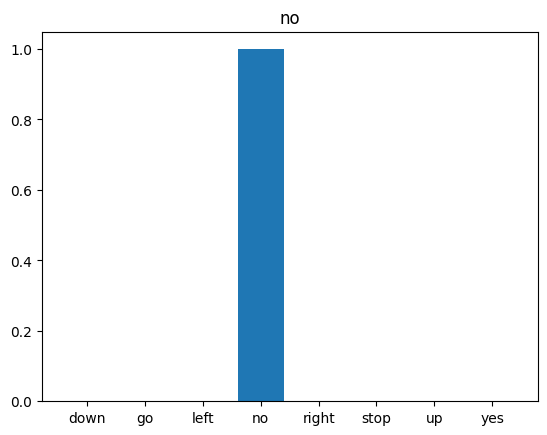

In [23]:
x = 'testdata/no.wav'

x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
# x = get_spectrogram(x)
x = x[tf.newaxis,...]

prediction = model(x)
print(prediction)

logits = prediction['predictions']
probabilities = tf.nn.softmax(logits).numpy()


x_labels = ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']
# plt.bar(x_labels, tf.nn.softmax(prediction))
plt.bar(x_labels, probabilities[0])
plt.title('no')
plt.show()